In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/face_dataset.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
train_dir = '/content/face_dataset/face/train'
val_dir = '/content/face_dataset/face/test'

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 4728 images belonging to 2 classes.
Found 1778 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 61s 351ms/step - accuracy: 0.8475 - loss: 0.3268 - val_accuracy: 0.9826 - val_loss: 0.0720
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 38s 259ms/step - accuracy: 0.9789 - loss: 0.0713 - val_accuracy: 0.9882 - val_loss: 0.0460
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 39s 261ms/step - accuracy: 0.9909 - loss: 0.0433 - val_accuracy: 0.9921 - val_loss: 0.0297
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 39s 264ms/step - accuracy: 0.9888 - loss: 0.0354 - val_accuracy: 0.9944 - val_loss: 0.0233
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 37s 249ms/step - accuracy: 0.9935 - loss: 0.0241 - val_accuracy: 0.9978 - val_loss: 0.0180
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 38s 254ms/step - accuracy: 0.9946 - loss: 0.0221 - val_accuracy: 0.9949 - val_loss: 0.0300
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 39s 260ms/step - accuracy: 0.9959 - loss: 0.0192 - val_accuracy: 0.9972 - val_loss: 0.0121
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 39s 262ms/step - accuracy: 0.9962 - loss: 0

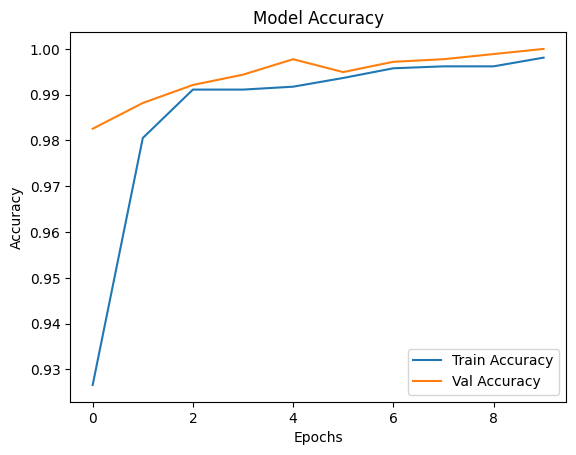

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [ ]:
import cv2
import numpy as np

def predict_glasses(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    pred = model.predict(img)[0][0]
    if pred >= 0.5:
        print("Prediction: With Glasses 😎")
    else:
        print("Prediction: Without Glasses 🙂")

In [ ]:
predict_glasses("/content/face_dataset/face/test/no_glasses/face-1113.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: With Glasses 😎
